# Titanic Dataset Predictions and Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training_df = pd.read_csv('train.csv')

In [3]:
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = pd.read_csv('test.csv')

In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
training_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

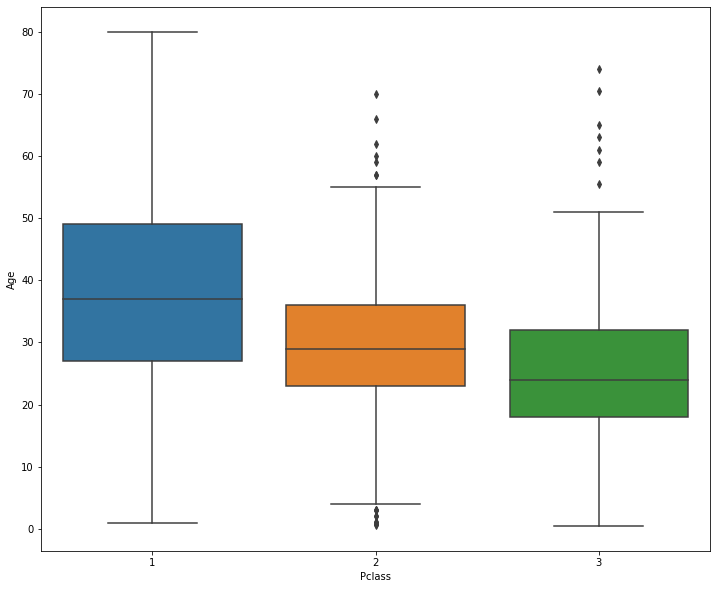

In [7]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='Pclass', y='Age', data=training_df)

In [8]:
mean_age_for_class = training_df.groupby('Pclass').mean()['Age']

In [9]:
training_df['Age'] = training_df[['Age', 'Pclass']].apply(lambda x: mean_age_for_class[x[1]] if np.isnan(x[0]) else x[0], axis=1)
test_df['Age'] = test_df[['Age', 'Pclass']].apply(lambda x: mean_age_for_class[x[1]] if np.isnan(x[0]) else x[0], axis=1)

In [10]:
training_df.isnull().sum() / len(training_df.index) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
drop_cols = ['PassengerId', 'Name', 'Cabin', 'Ticket']

In [12]:
training_df.drop(drop_cols, axis=1, inplace=True)

In [13]:
test_df.drop(drop_cols, axis=1, inplace=True)

In [14]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


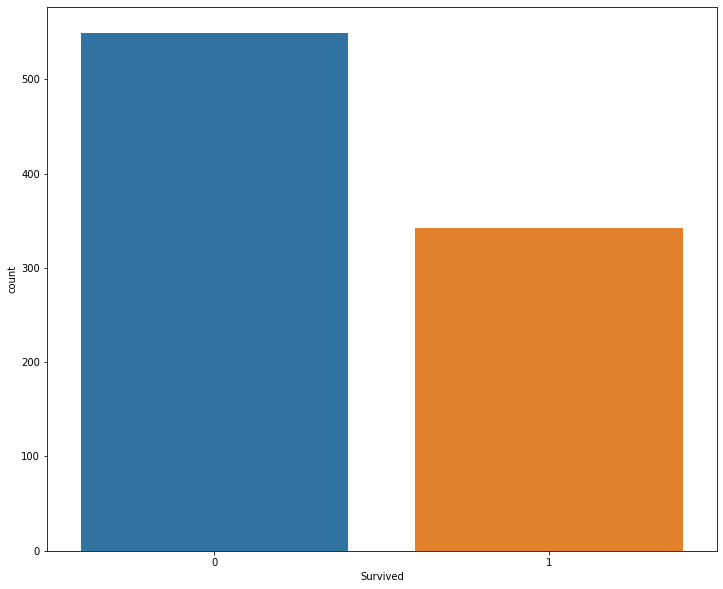

In [15]:
plt.figure(figsize=(12, 10))
sns.countplot(x='Survived', data=training_df)

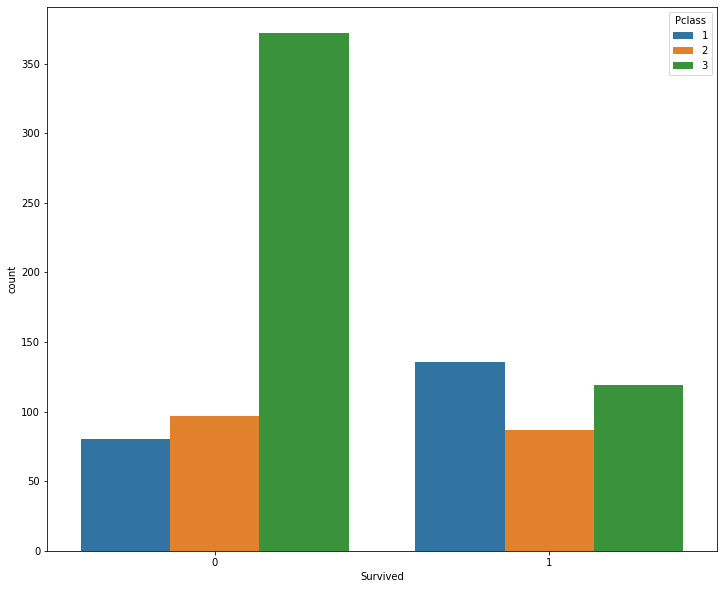

In [16]:
plt.figure(figsize=(12, 10))
sns.countplot(x='Survived', hue='Pclass', data=training_df)

In [17]:
cat_cols = ['Sex', 'Embarked']

In [18]:
dummies = pd.get_dummies(training_df[cat_cols], drop_first=True)
training_df = pd.concat([training_df.drop(cat_cols, axis=1), dummies], axis=1)

In [19]:
dummies = pd.get_dummies(test_df[cat_cols], drop_first=True)
test_df = pd.concat([test_df.drop(cat_cols, axis=1), dummies], axis=1)

In [20]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        417 non-null    float64
 5   Sex_male    418 non-null    uint8  
 6   Embarked_Q  418 non-null    uint8  
 7   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = training_df.drop('Survived', axis=1).values
y = training_df['Survived'].values.reshape(-1, 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=100)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [29]:
lrc = LogisticRegression()
svc = SVC()
rfc = RandomForestClassifier()

In [30]:
lrc_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [50, 100, 200, 400]
}

In [31]:
lrc_grid_search = GridSearchCV(estimator=lrc, param_grid=lrc_param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

In [32]:
svc_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [1, .1, .01, .001, .0001],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

In [33]:
svc_grid_search = GridSearchCV(estimator=svc, param_grid=svc_param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

In [34]:
rfc_param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
    'max_depth': [int(x) for x in np.linspace(10, 100, num = 10)],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [35]:
rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

In [36]:
lrc_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [50, 100, 200, 400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [37]:
lrc_grid_search.best_params_

{'C': 1, 'max_iter': 50}

In [38]:
svc_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [39]:
svc_grid_search.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [40]:
rfc_grid_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 9776 tasks    

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [41]:
rfc_grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 200}

In [42]:
lrc_pred = lrc_grid_search.predict(X_test)
svc_pred = svc_grid_search.predict(X_test)
rfc_pred = rfc_grid_search.predict(X_test)

In [43]:
pred_df = pd.DataFrame()
pred_df['Survived'] = y_test[:,0]
pred_df['LRC'] = lrc_pred
pred_df['SVC'] = svc_pred
pred_df['RFC'] = rfc_pred

In [44]:
pred_df.head()

,Survived,LRC,SVC,RFC
0,0,1,0,1
1,1,1,1,1
2,1,0,0,0
3,1,1,1,1
4,0,0,0,0


In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
lrc_mat = confusion_matrix(pred_df['Survived'], pred_df['LRC'])
svc_mat = confusion_matrix(pred_df['Survived'], pred_df['SVC'])
rfc_mat = confusion_matrix(pred_df['Survived'], pred_df['RFC'])

[Text(51.0, 0.5, 'Actual'),
 Text(0.5, 33.0, 'Predicted'),
 Text(0.5, 1, 'Confussion Matrix (Linear Regression)')]

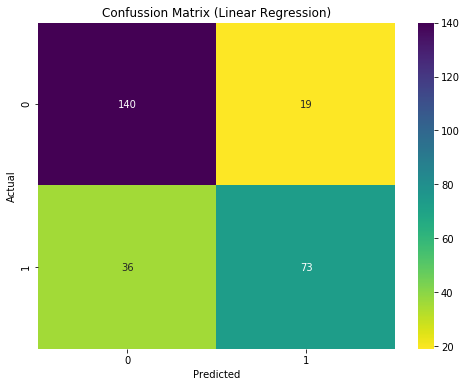

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(lrc_mat, cmap='viridis_r', annot=True, fmt='d').set(title='Confussion Matrix (Linear Regression)', ylabel='Actual', xlabel='Predicted')

In [48]:
lrc_mat

array([[140,  19],
       [ 36,  73]], dtype=int64)

[Text(51.0, 0.5, 'Actual'),
 Text(0.5, 33.0, 'Predicted'),
 Text(0.5, 1, 'Confussion Matrix (SVC)')]

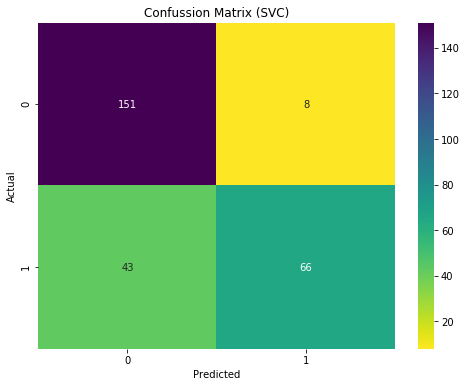

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(svc_mat, cmap='viridis_r', annot=True, fmt='d').set(title='Confussion Matrix (SVC)', ylabel='Actual', xlabel='Predicted')

[Text(51.0, 0.5, 'Actual'),
 Text(0.5, 33.0, 'Predicted'),
 Text(0.5, 1, 'Confussion Matrix (Random Forrest)')]

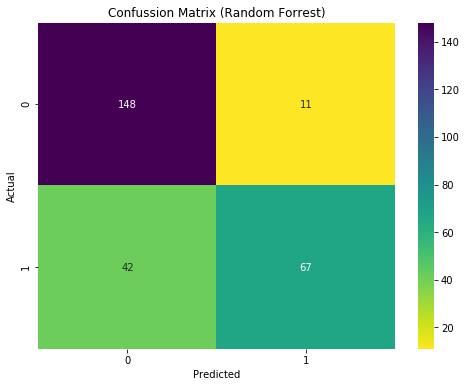

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(rfc_mat, cmap='viridis_r', annot=True, fmt='d').set(title='Confussion Matrix (Random Forrest)', ylabel='Actual', xlabel='Predicted')

In [51]:
from sklearn.metrics import classification_report

In [52]:
print('Logistic Regression:')
print(classification_report(pred_df['Survived'], pred_df['LRC']))
print('SVC:')
print(classification_report(pred_df['Survived'], pred_df['SVC']))
print('Random Forrest:')
print(classification_report(pred_df['Survived'], pred_df['RFC']))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       159
           1       0.79      0.67      0.73       109

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

SVC:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       159
           1       0.89      0.61      0.72       109

    accuracy                           0.81       268
   macro avg       0.84      0.78      0.79       268
weighted avg       0.82      0.81      0.80       268

Random Forrest:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       159
           1       0.86      0.61      0.72       109

    accuracy                           0.80       268
   macro avg       0.82      0.77      0.78       268
weighted avg       0.81      0.8

In [57]:
test_df['Fare'] = test_df[['Fare', 'Pclass']].apply(lambda x: training_df.groupby('Pclass').mean()['Fare'][x[1]] if np.isnan(x[0]) else x[0], axis=1)

In [58]:
main_test = scaler.transform(test_df)

In [59]:
pred_format = pd.read_csv('gender_submission.csv')

In [60]:
pred_format['Survived'] = svc_grid_search.predict(main_test)

In [62]:
pred_format.to_csv('submission.csv', index=False)